## 1. The Manua Loa CO2 data [15 points] 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_7914/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
DATA_DIR = Path.home()/Path('shared/climate-data')

co2_file = DATA_DIR / "monthly_in_situ_co2_mlo_cleaned.csv"
data = pd.read_csv(co2_file, na_values=-99.99).dropna()

### Question 3 [5 points]

Next, recreate the following figure, which is much closer to the one in the lecture:

<img src="figures/annual-anomaly-new.png" width="700px" />

**Hints:** 
- in order to get that smooth curve, you'll need to use `from scipy.interpolate import CubicSpline`. You can find the documentation for `CubicSpline` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html).
- The "Seasonal Anomaly" inset graph can be created with `ax.inset_axes(...)`. You can treat the `Axes` object returned like any other `Axes` object.
- Remember that you can set the tick labels with `ax.set_xticks(...)`.
- To get the data points plotted as red dots, when you use `ax.plot(...)`, pass in `"r."` as the argument immediately following any data you pass in. The `"r"` indicates the color, while the `"."` indicates how the data will be plotted (if you don't put the `"."`, it will be a line instead).

In [3]:
#CODE FROM Q02

# Calculate the annual mean for each month
annual_means = data.groupby('year')['c02'].mean()

# Subtract the annual mean from each data point
data_copy = data.copy()
for year in data_copy['year'].unique():
    data_copy.loc[data_copy['year'] == year, 'c02'] -= annual_means[year]
    
# Calculate the monthly anomaly
monthly_anomaly = data_copy.groupby('month').mean()[['c02']]


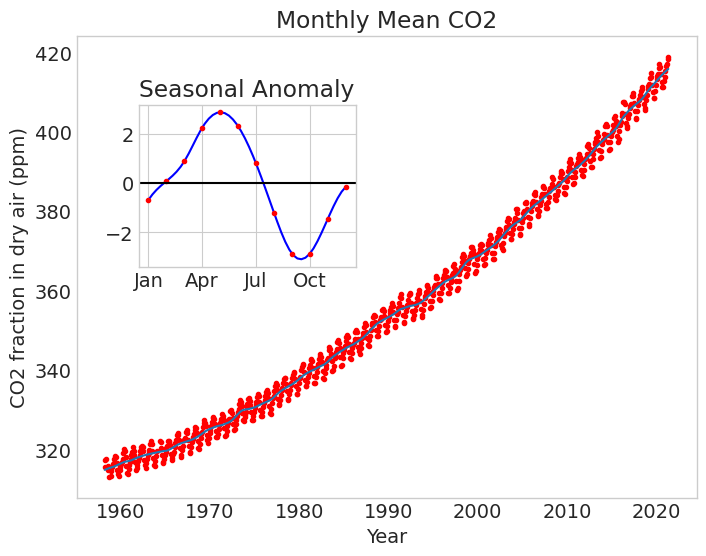

In [4]:
# BEGIN SOLUTION

from scipy.interpolate import CubicSpline

fig, ax = plt.subplots()

ax.plot("fraction_date", "data_filled", "r.", data=data)
ax.plot("fraction_date", "data_adjusted_seasonally_fit", data=data)
ax.set_xlabel("Year")
ax.set_ylabel("CO2 fraction in dry air (ppm)")
ax.set_title("Monthly Mean CO2")
ax.grid(False)

axin1 = ax.inset_axes([0.1, 0.5, 0.35, 0.35])  #inset_axes creates the smaller graph
space = np.linspace(1, 12) #continuous x-axis rather than discrete (which would make it shaggy)
cs = CubicSpline(monthly_anomaly.index, monthly_anomaly.c02)
cs(space) #throwing the continuous "space" axis into the function?
axin1.plot(space, cs(space), "b") #creates the blue line
axin1.plot(monthly_anomaly.c02, "r.") #creates the red dots
axin1.set_xticks([1, 4, 7, 10])
axin1.set_xticklabels(["Jan", "Apr", "Jul", "Oct"])
axin1.axhline(y = 0, color = "black", linestyle = '-')
axin1.set_title("Seasonal Anomaly");

 # END SOLUTION

In [5]:
# Save figure
plt.savefig('outputs/climate-Q03.png',bbox_inches='tight')

<Figure size 800x600 with 0 Axes>